In [7]:
#ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GFC
from sklearn.model_selection import GridSearchCV
from pandas import Series, DataFrame
%matplotlib inline

In [8]:
#データの読み込み
train = pd.read_csv("./dataset/input/train.csv")
test=pd.read_csv('./dataset/input/test.csv')

In [9]:
train["y"] = (train["y"] == "yes").astype(np.int)

In [10]:
print(train.describe())
train["pdays"] = train["pdays"].replace(-1,0)
print(train.describe())

                 id           age        balance           day      duration  \
count  27100.000000  27100.000000   27100.000000  27100.000000  27100.000000   
mean   13549.500000     36.073284   47682.901771     16.747565    229.325387   
std     7823.240484      7.816417   31650.760036      8.569588    204.939958   
min        0.000000     22.000000   -6847.000000      1.000000      0.000000   
25%     6774.750000     31.000000   20015.750000      8.000000    121.000000   
50%    13549.500000     33.000000   47624.000000     17.000000    158.000000   
75%    20324.250000     37.000000   75330.000000     26.000000    345.000000   
max    27099.000000     90.000000  102121.000000     31.000000   3076.000000   

           campaign         pdays      previous        y  
count  27100.000000  27100.000000  27100.000000  27100.0  
mean       1.775830    432.482399      0.085720      0.0  
std        0.950045    252.150648      0.365889      0.0  
min        1.000000     -1.000000      0.00

In [12]:
train["age_range"] = 1
train.loc[train["age"] < 20, "age_range"] = 1
train.loc[(train["age"] >= 20) & (train["age"] < 30), "age_range"] = 2
train.loc[(train["age"] >= 30) & (train["age"] < 40), "age_range"] = 3
train.loc[(train["age"] >= 40) & (train["age"] < 50), "age_range"] = 4
train.loc[(train["age"] >= 50) & (train["age"] < 60), "age_range"] = 5
train.loc[(train["age"] >= 60) & (train["age"] < 70), "age_range"] = 6
train.loc[(train["age"] >= 70) & (train["age"] < 80), "age_range"] = 7
train.loc[(train["age"] >= 80) & (train["age"] < 90), "age_range"] = 8
train.loc[train["age"] >= 90, "age_range"] = 9

In [13]:
print(train.head(10))

   id  age           job  marital  education default  balance housing loan  \
0   0   31      services  married  secondary      no    12294     yes   no   
1   1   29  entrepreneur   single   tertiary      no    43027      no   no   
2   2   35    management  married   tertiary      no    12252     yes   no   
3   3   31    technician  married  secondary      no    99121     yes  yes   
4   4   48    unemployed  married    primary      no    42005     yes   no   
5   5   30   blue-collar  married    primary      no    -6160      no   no   
6   6   33   blue-collar  married  secondary      no    88282     yes   no   
7   7   30        admin.   single  secondary      no    59830     yes   no   
8   8   32        admin.   single  secondary      no     7958      no   no   
9   9   31   blue-collar  married    primary      no    28066     yes  yes   

     contact  day month  duration  campaign  pdays  previous poutcome  y  \
0   cellular   21   nov       101         3    498         0    o

0     1758
1        2
2       28
3       35
4       36
5       61
6      112
7      190
8      371
9    24507
Name: balance_range, dtype: int64


(array([1.7580e+03, 2.0000e+00, 2.8000e+01, 3.5000e+01, 3.6000e+01,
        6.1000e+01, 1.1200e+02, 1.9000e+02, 3.7100e+02, 2.4507e+04]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

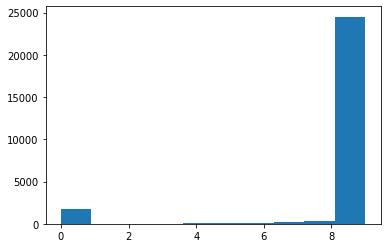

In [14]:
train["balance_range"] = 1
train.loc[train["balance"] < 0, "balance_range"] = 0
train.loc[(train["balance"] >= 0) & (train["balance"] < 10), "balance_range"] = 1
train.loc[(train["balance"] >= 10) & (train["balance"] < 100), "balance_range"] = 2
train.loc[(train["balance"] >= 100) & (train["balance"] < 250), "balance_range"] = 3
train.loc[(train["balance"] >= 250) & (train["balance"] < 450), "balance_range"] = 4
train.loc[(train["balance"] >= 450) & (train["balance"] < 700), "balance_range"] = 5
train.loc[(train["balance"] >= 700) & (train["balance"] < 1200), "balance_range"] = 6
train.loc[(train["balance"] >= 1200) & (train["balance"] < 2000), "balance_range"] = 7
train.loc[(train["balance"] >= 2000) & (train["balance"] < 3500), "balance_range"] = 8
train.loc[train["balance"] >= 3500, "balance_range"] = 9
 
print(train["balance_range"].value_counts(sort=False))
plt.hist(train["balance_range"])

In [15]:
train["day_range"] = 1
train.loc[train["day"] <= 10, "day_range"] = 1
train.loc[(train["day"] > 10) & (train["day"] <= 20), "day_range"] = 2
train.loc[train["day"] > 20, "day_range"] = 3
print(train["day_range"].value_counts(sort=False))

1     7316
2    10419
3     9365
Name: day_range, dtype: int64


In [16]:
print(train.groupby(["day_range"]).agg(["count","mean"])["y"])
print(train.groupby(["month"]).agg(["count","mean"])["y"].sort_values("mean",ascending=False))

           count  mean
day_range             
1           7316     0
2          10419     0
3           9365     0
       count  mean
month             
apr     2005     0
aug     3381     0
feb     1083     0
jan      361     0
jul     3307     0
jun     3086     0
mar      214     0
may    11232     0
nov     2307     0
oct       97     0
sep       27     0


In [18]:
train["month_BME"] = 1
train.loc[(train["month"] == "jan") & (train["day_range"] == 1), "month_BME"] = 3
train.loc[(train["month"] == "jan") & (train["day_range"] == 2), "month_BME"] = 2
train.loc[(train["month"] == "jan") & (train["day_range"] == 3), "month_BME"] = 1
train.loc[(train["month"] == "oct") & (train["day_range"] == 1), "month_BME"] = 36
train.loc[(train["month"] == "oct") & (train["day_range"] == 2), "month_BME"] = 35
train.loc[(train["month"] == "oct") & (train["day_range"] == 3), "month_BME"] = 34
 
print(train.groupby(["month_BME"]).agg(["count","mean"])["y"].sort_values("mean"))

           count  mean
month_BME             
1          26936     0
2             16     0
3             51     0
34            55     0
35            19     0
36            23     0


In [21]:
from sklearn import preprocessing

In [42]:
train_le = train.copy()
test_le = test.copy()

for col in ["job","marital","education","default","housing","loan","contact","month","poutcome"]:
    le = preprocessing.LabelEncoder()
    le.fit(pd.concat([train_le[col], test_le[col]], axis=0))
    train_le[col] = le.transform(train[col])
    test_le[col] = le.transform(test[col])

In [43]:
train.corr()

,id,age,balance,day,duration,campaign,pdays,previous,y,age_range,balance_range,day_range,month_BME
id,1.000000,0.008676,0.002334,-0.001724,-0.001855,-0.007897,0.001370,-0.003045,NaN,0.010516,0.005292,-0.003861,0.008151
age,0.008676,1.000000,-0.001185,-0.059669,-0.055642,0.037633,0.008550,0.037545,NaN,0.931981,-0.005029,-0.062390,0.040485
balance,0.002334,-0.001185,1.000000,0.003816,0.003144,-0.001229,0.003018,0.009717,NaN,0.000643,0.464260,0.005925,-0.002172
day,-0.001724,-0.059669,0.003816,1.000000,0.134440,-0.060326,-0.000433,-0.048624,NaN,-0.057870,0.004404,0.954716,0.028290
duration,-0.001855,-0.055642,0.003144,0.134440,1.000000,-0.094643,0.003804,-0.015184,NaN,-0.051296,0.002857,0.134553,0.001620
campaign,-0.007897,0.037633,-0.001229,-0.060326,-0.094643,1.000000,-0.003626,-0.038244,NaN,0.039260,-0.000244,-0.067927,-0.015424
pdays,0.001370,0.008550,0.003018,-0.000433,0.003804,-0.003626,1.000000,0.002186,NaN,0.003172,0.001001,0.000931,0.005123
previous,-0.003045,0.037545,0.009717,-0.048624,-0.015184,-0.038244,0.002186,1.000000,NaN,0.048722,0.002057,-0.043864,0.099889
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_range,0.010516,0.931981,0.000643,-0.057870,-0.051296,0.039260,0.003172,0.048722,NaN,1.000000,-0.002130,-0.062420,0.047835


In [44]:
corr_train = train.corr()

In [45]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'age_range', 'balance_range',
       'day_range', 'month_BME'],
      dtype='object')

In [46]:
corr_y = pd.DataFrame(data = corr_train["y"], index=train.columns)
print(corr_y)

                y
id            NaN
age           NaN
job           NaN
marital       NaN
education     NaN
default       NaN
balance       NaN
housing       NaN
loan          NaN
contact       NaN
day           NaN
month         NaN
duration      NaN
campaign      NaN
pdays         NaN
previous      NaN
poutcome      NaN
y             NaN
age_range     NaN
balance_range NaN
day_range     NaN
month_BME     NaN


In [47]:
corr_train_le = train_le.corr() 
corr_le_y = pd.DataFrame(index = train_le.columns, data = corr_train_le["y"])
print(corr_le_y)

                y
id            NaN
age           NaN
job           NaN
marital       NaN
education     NaN
default       NaN
balance       NaN
housing       NaN
loan          NaN
contact       NaN
day           NaN
month         NaN
duration      NaN
campaign      NaN
pdays         NaN
previous      NaN
poutcome      NaN
y             NaN
age_range     NaN
balance_range NaN
day_range     NaN
month_BME     NaN


In [49]:
train_le2 = train_le.drop(["id", "age", "balance", "day", "month", "campaign", "previous"], axis=1)
print(train_le2.columns)
test_le2 = test_le.drop(["id","age","balance","day","month","campaign","previous"],axis=1)
print(test_le2.columns)

KeyError: "['id' 'age' 'balance' 'day' 'month' 'campaign' 'previous'] not found in axis"